# Linear regression -  Problemas con la reg lineal [Outliers]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data_auto = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\auto\auto-mpg.csv')

In [3]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


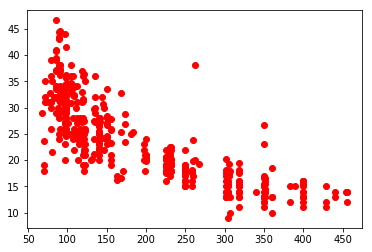

In [4]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

In [7]:
# Creación de linear regresion eliminando NAs

X = data_auto['displacement'].fillna(data_auto['displacement'].mean())
X = X[:,np.newaxis]
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm = LinearRegression()
lm.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
lm.score(X,Y)

0.6261049762826918

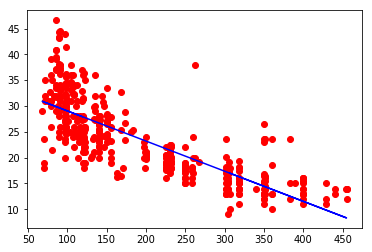

In [10]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X, lm.predict(X), color = 'blue')

In [14]:
#Filtrar los outlier
data_auto[(data_auto['displacement']>300) & (data_auto['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [17]:
#Eliminar filas de outliers (por índices)
data_auto_clean = data_auto.drop([395,258,305,372])

In [18]:
data_auto_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [21]:
# Mejora el mode
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
X = X[:,np.newaxis]
Y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X,Y)

0.6466514317531822

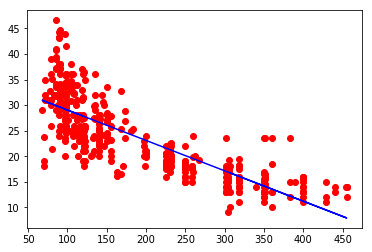

In [20]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X, lm.predict(X), color = 'blue')